In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from tensorflow import keras

from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("features_3_sec.csv")

shape = df.shape

df.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df["label"].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [4]:
df = df.drop(labels=['filename', 'length'], axis=1)
df.head(5)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [5]:
df.columns

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'],
      d

In [6]:
print(df.columns)

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'],
      d

In [7]:
label_list = df.iloc[:, -1]

encde = LabelEncoder()
y = encde.fit_transform(label_list)

In [8]:
df.iloc[:, :-1]

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [9]:
ft = StandardScaler().fit(np.array(df.iloc[:, :-1], dtype=float))
X=ft.transform(np.array(df.iloc[:, :-1], dtype=float))
X_train, X_v, y_train, y_v = train_test_split(X, y, test_size=0.20,random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_v, y_v, test_size=0.50,random_state=42)

In [10]:
X_train.shape

(7992, 57)

In [11]:
X_test.shape

(999, 57)

In [12]:
def trainModel(model, epochs, optimizer, earlystop):
    batch_size = X_train.shape[0]
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model.fit(X_train, y_train,
                     validation_data=(X_val, y_val),
                     epochs=epochs, batch_size=batch_size, callbacks=[earlystop])

In [13]:
np.shape(X_train[0])

(57,)

In [14]:
def createModel2():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),

        layers.Dense(64, activation='relu'),
        layers.Dropout(0.4),
        
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.4),
        
        layers.Dense(16, activation='relu'),
    
        layers.Dense(10, activation='softmax')
    ])
    return model

In [15]:
import time

start = time.time()
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model = createModel2()
hist = trainModel(model=model, epochs=500, optimizer='adam', earlystop=earlystop)
end = time.time()
print("The time of execution of above program is :",
      (end - start) * 10 ** 3, "ms")


Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 2.3765 - accuracy: 0.0978 - val_loss: 2.2816 - val_accuracy: 0.1992
Epoch 2/500
1/1 [==============================] - 0s 36ms/step - loss: 2.3257 - accuracy: 0.1081 - val_loss: 2.2769 - val_accuracy: 0.2462
Epoch 3/500
1/1 [==============================] - 0s 38ms/step - loss: 2.3063 - accuracy: 0.1177 - val_loss: 2.2748 - val_accuracy: 0.2513
Epoch 4/500
1/1 [==============================] - 0s 38ms/step - loss: 2.2913 - accuracy: 0.1285 - val_loss: 2.2704 - val_accuracy: 0.2593
Epoch 5/500
1/1 [==============================] - 0s 37ms/step - loss: 2.2805 - accuracy: 0.1280 - val_loss: 2.2633 - val_accuracy: 0.2823
Epoch 6/500
1/1 [==============================] - 0s 36ms/step - loss: 2.2731 - accuracy: 0.1404 - val_loss: 2.2534 - val_accuracy: 0.2903
Epoch 7/500
1/1 [==============================] - 0s 36ms/step - loss: 2.2610 - accuracy: 0.1484 - val_loss: 2.2401 - val_accuracy: 0.3003
Epoch 8/500
1/1 [=====

1/1 [==============================] - 0s 33ms/step - loss: 1.5907 - accuracy: 0.4323 - val_loss: 1.3206 - val_accuracy: 0.5455
Epoch 60/500
1/1 [==============================] - 0s 32ms/step - loss: 1.5920 - accuracy: 0.4304 - val_loss: 1.3089 - val_accuracy: 0.5475
Epoch 61/500
1/1 [==============================] - 0s 36ms/step - loss: 1.5649 - accuracy: 0.4379 - val_loss: 1.2976 - val_accuracy: 0.5526
Epoch 62/500
1/1 [==============================] - 0s 34ms/step - loss: 1.5468 - accuracy: 0.4464 - val_loss: 1.2864 - val_accuracy: 0.5606
Epoch 63/500
1/1 [==============================] - 0s 34ms/step - loss: 1.5437 - accuracy: 0.4499 - val_loss: 1.2747 - val_accuracy: 0.5686
Epoch 64/500
1/1 [==============================] - 0s 38ms/step - loss: 1.5465 - accuracy: 0.4625 - val_loss: 1.2646 - val_accuracy: 0.5746
Epoch 65/500
1/1 [==============================] - 0s 33ms/step - loss: 1.5104 - accuracy: 0.4678 - val_loss: 1.2535 - val_accuracy: 0.5756
Epoch 66/500
1/1 [========

1/1 [==============================] - 0s 40ms/step - loss: 1.0563 - accuracy: 0.6413 - val_loss: 0.7835 - val_accuracy: 0.7618
Epoch 118/500
1/1 [==============================] - 0s 40ms/step - loss: 1.0748 - accuracy: 0.6409 - val_loss: 0.7750 - val_accuracy: 0.7628
Epoch 119/500
1/1 [==============================] - 0s 41ms/step - loss: 1.0483 - accuracy: 0.6473 - val_loss: 0.7675 - val_accuracy: 0.7678
Epoch 120/500
1/1 [==============================] - 0s 41ms/step - loss: 1.0431 - accuracy: 0.6463 - val_loss: 0.7611 - val_accuracy: 0.7678
Epoch 121/500
1/1 [==============================] - 0s 39ms/step - loss: 1.0428 - accuracy: 0.6518 - val_loss: 0.7550 - val_accuracy: 0.7688
Epoch 122/500
1/1 [==============================] - 0s 43ms/step - loss: 1.0313 - accuracy: 0.6547 - val_loss: 0.7494 - val_accuracy: 0.7688
Epoch 123/500
1/1 [==============================] - 0s 41ms/step - loss: 1.0373 - accuracy: 0.6548 - val_loss: 0.7433 - val_accuracy: 0.7738
Epoch 124/500
1/1 [=

Epoch 175/500
1/1 [==============================] - 0s 40ms/step - loss: 0.7526 - accuracy: 0.7559 - val_loss: 0.5151 - val_accuracy: 0.8428
Epoch 176/500
1/1 [==============================] - 0s 40ms/step - loss: 0.7305 - accuracy: 0.7659 - val_loss: 0.5113 - val_accuracy: 0.8418
Epoch 177/500
1/1 [==============================] - 0s 41ms/step - loss: 0.7248 - accuracy: 0.7669 - val_loss: 0.5078 - val_accuracy: 0.8418
Epoch 178/500
1/1 [==============================] - 0s 40ms/step - loss: 0.7098 - accuracy: 0.7708 - val_loss: 0.5043 - val_accuracy: 0.8428
Epoch 179/500
1/1 [==============================] - 0s 40ms/step - loss: 0.7142 - accuracy: 0.7705 - val_loss: 0.5018 - val_accuracy: 0.8458
Epoch 180/500
1/1 [==============================] - 0s 40ms/step - loss: 0.7186 - accuracy: 0.7625 - val_loss: 0.4998 - val_accuracy: 0.8468
Epoch 181/500
1/1 [==============================] - 0s 41ms/step - loss: 0.7117 - accuracy: 0.7735 - val_loss: 0.4987 - val_accuracy: 0.8448
Epoch 

Epoch 233/500
1/1 [==============================] - 0s 45ms/step - loss: 0.5327 - accuracy: 0.8377 - val_loss: 0.4009 - val_accuracy: 0.8889
Epoch 234/500
1/1 [==============================] - 0s 43ms/step - loss: 0.5438 - accuracy: 0.8321 - val_loss: 0.3980 - val_accuracy: 0.8909
Epoch 235/500
1/1 [==============================] - 0s 45ms/step - loss: 0.5338 - accuracy: 0.8342 - val_loss: 0.3956 - val_accuracy: 0.8909
Epoch 236/500
1/1 [==============================] - 0s 43ms/step - loss: 0.5504 - accuracy: 0.8328 - val_loss: 0.3936 - val_accuracy: 0.8899
Epoch 237/500
1/1 [==============================] - 0s 44ms/step - loss: 0.5194 - accuracy: 0.8428 - val_loss: 0.3924 - val_accuracy: 0.8929
Epoch 238/500
1/1 [==============================] - 0s 44ms/step - loss: 0.5283 - accuracy: 0.8367 - val_loss: 0.3915 - val_accuracy: 0.8909
Epoch 239/500
1/1 [==============================] - 0s 43ms/step - loss: 0.5121 - accuracy: 0.8473 - val_loss: 0.3905 - val_accuracy: 0.8899
Epoch 

Epoch 291/500
1/1 [==============================] - 0s 49ms/step - loss: 0.4104 - accuracy: 0.8818 - val_loss: 0.3365 - val_accuracy: 0.9039
Epoch 292/500
1/1 [==============================] - 0s 53ms/step - loss: 0.4241 - accuracy: 0.8780 - val_loss: 0.3352 - val_accuracy: 0.9069
Epoch 293/500
1/1 [==============================] - 0s 51ms/step - loss: 0.4162 - accuracy: 0.8784 - val_loss: 0.3333 - val_accuracy: 0.9059
Epoch 294/500
1/1 [==============================] - 0s 50ms/step - loss: 0.4143 - accuracy: 0.8825 - val_loss: 0.3321 - val_accuracy: 0.9079
Epoch 295/500
1/1 [==============================] - 0s 48ms/step - loss: 0.4000 - accuracy: 0.8831 - val_loss: 0.3317 - val_accuracy: 0.9079
Epoch 296/500
1/1 [==============================] - 0s 48ms/step - loss: 0.4004 - accuracy: 0.8890 - val_loss: 0.3315 - val_accuracy: 0.9099
Epoch 297/500
1/1 [==============================] - 0s 46ms/step - loss: 0.4022 - accuracy: 0.8846 - val_loss: 0.3299 - val_accuracy: 0.9079
Epoch 

Epoch 349/500
1/1 [==============================] - 0s 46ms/step - loss: 0.3262 - accuracy: 0.9085 - val_loss: 0.3188 - val_accuracy: 0.9149
Epoch 350/500
1/1 [==============================] - 0s 46ms/step - loss: 0.3208 - accuracy: 0.9117 - val_loss: 0.3191 - val_accuracy: 0.9179
Epoch 351/500
1/1 [==============================] - 0s 46ms/step - loss: 0.3214 - accuracy: 0.9099 - val_loss: 0.3200 - val_accuracy: 0.9179
Epoch 352/500
1/1 [==============================] - 0s 47ms/step - loss: 0.3211 - accuracy: 0.9107 - val_loss: 0.3197 - val_accuracy: 0.9179
Epoch 353/500
1/1 [==============================] - 0s 46ms/step - loss: 0.3197 - accuracy: 0.9102 - val_loss: 0.3183 - val_accuracy: 0.9199
Epoch 354/500
1/1 [==============================] - 0s 46ms/step - loss: 0.3164 - accuracy: 0.9119 - val_loss: 0.3164 - val_accuracy: 0.9209
Epoch 355/500
1/1 [==============================] - 0s 47ms/step - loss: 0.3268 - accuracy: 0.9094 - val_loss: 0.3136 - val_accuracy: 0.9219
Epoch 

In [16]:
def plotValidate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

16/16 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.8959
0.4119729995727539
0.8958958983421326
Validation Accuracy 0.923923909664154


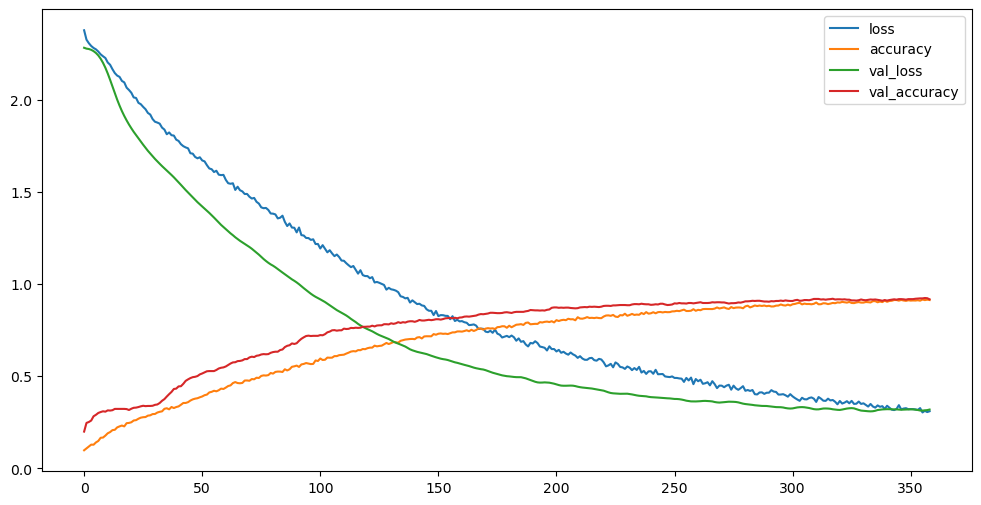

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print(test_loss)
print(test_acc)
plotValidate(hist)

In [18]:
from pydub import AudioSegment
from pydub.utils import make_chunks

myaudio = AudioSegment.from_file("blues.wav" , "wav") 
chunk_length_ms = 3000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

#Export all of the individual chunks as wav files
counter=0

for i, chunk in enumerate(chunks):
    chunk_name = "input{0}.wav".format(i)
    chunk.export("generatedinputs\\"+chunk_name, format="wav")
    counter+=1

In [19]:
import librosa

C:\Users\balla\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [20]:
x_inp_test=pd.DataFrame(columns=df.columns[0:-1])

In [21]:
x_inp_test

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var


In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
out=[]
for k in range(counter):
    snip="generatedinputs\\input{}.wav".format(k)
    y, sr = librosa.load(snip)
    y, _ = librosa.effects.trim(y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    rlf=librosa.feature.spectral_rolloff(y=y, sr=sr)
    tempo, _ = librosa.beat.beat_track(y, sr = sr)
    harmony, perceptr = librosa.effects.hpss(y)
    to_append =[np.mean(chroma_stft),np.var(chroma_stft),np.mean(rmse),np.var(rmse),np.mean(spec_cent),
    np.var(spec_cent),np.mean(spec_bw),np.var(spec_bw),np.mean(rolloff),np.var(rolloff),
    np.mean(zcr),np.var(zcr),np.mean(harmony),np.var(harmony),np.mean(perceptr),np.var(perceptr),tempo]
    mfcc_mean_var=[]
    for j in range(20):
        mfcc_mean_var.append(np.mean(mfcc[j]))
        mfcc_mean_var.append(np.var(mfcc[j]))
    to_append.extend(mfcc_mean_var)
    y_inp=pd.Series(np.array(to_append),index=df.columns[0:-1]) 
    x_inp_test=x_inp_test.append(y_inp,ignore_index=True)

In [23]:
x_inp_test

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335555,0.090997,0.130189,0.003559,1773.358004,169450.829520,1972.334258,117272.640189,3714.063439,1.083179e+06,...,-2.881668,39.547070,-3.230046,36.606857,0.696385,37.766132,-5.035945,33.668549,-0.239585,43.818882
1,0.343523,0.086782,0.112119,0.001491,1817.244034,90766.297254,2010.751494,65940.666243,3870.510442,6.721332e+05,...,4.050664,64.819778,-6.025472,40.548805,0.127131,51.048935,-2.808956,97.221497,5.771882,60.360352
2,0.347746,0.092495,0.130895,0.004552,1790.722357,110071.206973,2088.184750,73391.498001,4000.206581,7.859502e+05,...,4.730752,68.306793,-1.714475,28.136948,2.329553,47.211426,-1.925621,52.922436,2.466996,33.164001
3,0.363863,0.087207,0.131349,0.002338,1660.545231,109496.936296,1967.920582,79805.901351,3579.149639,9.032748e+05,...,-1.454310,48.543198,-3.786987,28.419544,1.153315,35.682701,-3.501979,50.610344,3.580636,32.325871
4,0.335481,0.088482,0.142370,0.001734,1634.465077,77425.419232,1954.633566,57359.695604,3480.096905,5.889230e+05,...,2.053746,30.829542,0.635797,44.645561,1.591108,51.415867,-3.364909,26.421087,0.501505,29.109531
5,0.374287,0.088972,0.131466,0.003510,1996.017650,211115.479208,2154.378517,73011.515162,4373.973295,1.062708e+06,...,2.091273,30.950649,-3.461423,34.216366,-0.450124,39.934879,-3.643696,32.521866,3.015992,28.928495
6,0.380956,0.088845,0.129517,0.003174,1962.139384,177314.014686,2146.576085,97964.948455,4324.778208,1.172169e+06,...,4.819421,34.264610,-2.104399,25.305710,1.416341,46.991249,-3.212211,38.579281,3.367521,25.767036
7,0.332675,0.091968,0.139707,0.002570,1703.371234,35322.106478,1984.045895,34066.057396,3627.516526,3.137583e+05,...,3.151013,38.173569,-3.557689,23.974079,-0.106229,26.752272,-1.958288,22.976870,0.247115,41.848137
8,0.348459,0.094078,0.132270,0.002522,1749.640820,137100.548144,1894.017385,116199.366198,3592.566481,1.054713e+06,...,-0.367742,43.697987,-4.256653,29.800327,2.083615,34.017033,-2.184457,80.908493,3.702477,97.842499
9,0.359891,0.083232,0.114406,0.001845,1767.490801,61144.377873,1879.782496,53327.384077,3512.810810,4.462709e+05,...,6.581156,44.138424,-3.329914,48.998123,0.094831,41.979404,-7.586964,96.841911,0.772220,40.325226


In [24]:
x_inp_test_std=ft.transform(np.array(x_inp_test.iloc[:, :], dtype=float))

In [25]:
x_inp_test_std.dtype

dtype('float64')

In [26]:
for i in range(counter):
    y_inp=x_inp_test_std[i].reshape(1,57)
    y_out=model.predict(y_inp)
    out.append(np.argmax(y_out))

1/1 [==============================] - 0s 20ms/step


In [27]:
df["label"].unique()[out]

array(['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'country'], dtype=object)

In [28]:
print("Prediction = "+max(set(list(df["label"].unique()[out])),key = list(df["label"].unique()[out]).count))

Prediction = blues


In [29]:
from pydub import AudioSegment
from pydub.utils import make_chunks

myaudio = AudioSegment.from_file("hiphop.wav" , "wav") 
chunk_length_ms = 3000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

#Export all of the individual chunks as wav files
counter=0

for i, chunk in enumerate(chunks):
    chunk_name = "input{0}.wav".format(i)
    chunk.export("generatedinputs2\\"+chunk_name, format="wav")
    counter+=1

In [30]:
x_inp_test=pd.DataFrame(columns=df.columns[0:-1])

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
out=[]
for k in range(counter):
    snip="generatedinputs2\\input{}.wav".format(k)
    y, sr = librosa.load(snip)
    y, _ = librosa.effects.trim(y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    rlf=librosa.feature.spectral_rolloff(y=y, sr=sr)
    tempo, _ = librosa.beat.beat_track(y, sr = sr)
    harmony, perceptr = librosa.effects.hpss(y)
    to_append =[np.mean(chroma_stft),np.var(chroma_stft),np.mean(rmse),np.var(rmse),np.mean(spec_cent),
    np.var(spec_cent),np.mean(spec_bw),np.var(spec_bw),np.mean(rolloff),np.var(rolloff),
    np.mean(zcr),np.var(zcr),np.mean(harmony),np.var(harmony),np.mean(perceptr),np.var(perceptr),tempo]
    mfcc_mean_var=[]
    for j in range(20):
        mfcc_mean_var.append(np.mean(mfcc[j]))
        mfcc_mean_var.append(np.var(mfcc[j]))
    to_append.extend(mfcc_mean_var)
    y_inp=pd.Series(np.array(to_append),index=df.columns[0:-1]) 
    x_inp_test=x_inp_test.append(y_inp,ignore_index=True)

In [32]:
x_inp_test_std=ft.transform(np.array(x_inp_test.iloc[:, :], dtype=float))

In [33]:
for i in range(counter):
    y_inp=x_inp_test_std[i].reshape(1,57)
    y_out=model.predict(y_inp)
    out.append(np.argmax(y_out))

1/1 [==============================] - 0s 19ms/step


In [34]:
df["label"].unique()[out]

array(['country', 'country', 'reggae', 'rock', 'hiphop', 'hiphop',
       'hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop',
       'hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop',
       'country', 'country', 'disco', 'pop', 'hiphop', 'hiphop', 'hiphop',
       'hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop',
       'hiphop', 'hiphop', 'hiphop', 'hiphop', 'pop', 'country', 'pop',
       'rock', 'hiphop', 'hiphop', 'disco', 'hiphop', 'hiphop', 'hiphop',
       'disco', 'country', 'reggae', 'hiphop', 'hiphop', 'disco', 'rock',
       'classical', 'classical'], dtype=object)

In [35]:
print("Prediction = "+max(set(list(df["label"].unique()[out])),key = list(df["label"].unique()[out]).count))

Prediction = hiphop
